In [12]:
import pandas as pd
import matplotlib as plt

df = pd.read_sql_table('Fahrerlaubnisse', 'sqlite:///../data/kba.sqlite')

a = df[df["Alter"] == 'bis 17']
a = a.set_index('Jahr')
a = a.rename(columns={'B': '17.B'})

b = df[df["Alter"] == '18']
b = b.set_index('Jahr')
b = b.rename(columns={'B': '18.B'})


c = df[df["Alter"] == '19']
c = c.set_index('Jahr')
c = c.rename(columns={'B': '19.B'})


d = df[df["Alter"] == '20']
d = d.set_index('Jahr')
d = d.rename(columns={'B': '20.B'})


e = df[df["Alter"] == '21']
e = e.set_index('Jahr')

f = df[df["Alter"] == '22']
f = f.set_index('Jahr')

g = df[df["Alter"] == '23']
g = g.set_index('Jahr')

h = df[df["Alter"] == '24']
h = h.set_index('Jahr')

i = df[df["Alter"] == '25']
i = i.set_index('Jahr')



<Axes: xlabel='Jahr'>

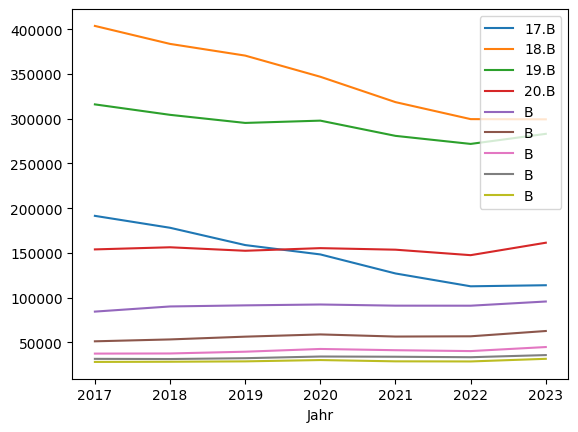

In [13]:
ax = a.plot(y=["17.B"])
ax = b.plot(y=["18.B"], ax=ax)
ax = c.plot(y=["19.B"], ax=ax)
ax = d.plot(y=["20.B"], ax=ax)
ax = e.plot(y=["B"], ax=ax)
ax = f.plot(y=["B"], ax=ax)
ax = g.plot(y=["B"], ax=ax)
ax = h.plot(y=["B"], ax=ax)
ax = i.plot(y=["B"], ax=ax)
ax

Erkenntnisse:
- Fahrerlaubnisse bei < 17 sinken generell => Frage: Vergleich mit Fahrerlaubnisse generell bzw. mit welchen ab 18?
- Alle Fahrerlaubnisse sinkend => in unterschiedlichem Grad
=> Interessant vor allem 17 und 18: BF17 macht etwa Hälfte aus!


# Unfälle


<Axes: xlabel='year'>

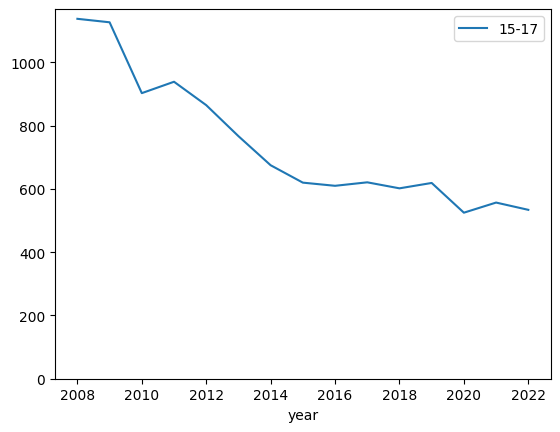

In [25]:
import pandas as pd
import matplotlib as plt

df = pd.read_sql_table('accidents', 'sqlite:///../data/kba.sqlite')
df = df.fillna(0)
df = df[['year', '15-17']]
df = df.groupby("year").sum()

ax = df.plot()
ax.set_ylim(ymin=0)
ax




/var/folders/5b/6x75ry_x0571jsb9gmzl77yh0000gn/T/ipykernel_3190/1037204334.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby("year").sum()


<Axes: xlabel='year'>

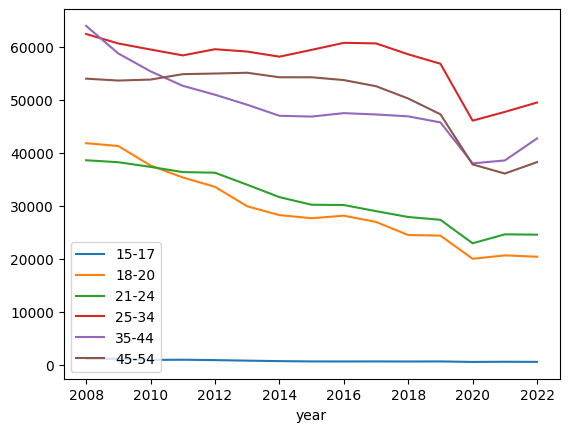

In [24]:
df = pd.read_sql_table('accidents', 'sqlite:///../data/kba.sqlite')
df = df.fillna(0)
df = df.groupby("year").sum()

df.plot()

Erkenntnisse:
- Generell alle Unfälle sinken
- bei jungen Menschen gerade ab 2012 aber besonders! => Faktoren berechnen
- 15-17: besonders krasser Abfall

=> Prozente berechnen!

/var/folders/5b/6x75ry_x0571jsb9gmzl77yh0000gn/T/ipykernel_3190/1620886681.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby("year").sum()


<Axes: xlabel='year'>

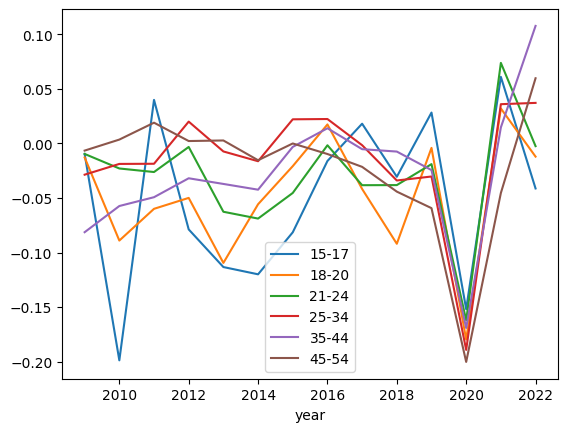

In [30]:
df = pd.read_sql_table('accidents', 'sqlite:///../data/kba.sqlite')
df = df.fillna(0)
df = df.groupby("year").sum()

change = df[['15-17', '18-20', '21-24', '25-34', '35-44', '45-54']].pct_change()
change.plot()

- 15-17 auch bei prozentualer Änderung eher immer unten => aber auch ausreißer!
=> es fehlen noch mehr Vorjahre um deutlichen Unterschied zu zeigen
- 18-20: nach 2016 sinkt auch recht stark => aber auch nicht zu deutlich

Ergebnisse:
- Fahrerlaubnisse: BF17 statistisch relevant 
- Unfälle:
 - unsicher, aber generell sinken die Zahlen
 - Frage, ob BF17 wirklich diese krasse Wirkung hatte
 => zumindest nicht schlechter; min. gleiche Entwicklung, kann sogar Verbesserung erkennen

Probleme:
- wenige Jahre verfügbar
- komplexe Statistik mit vielen Gründen => auch Corona-Knick erkennbar
- Einfluss auch über PKW-Unfälle hinaus?
- Schwere der Unfälle nicht beachtet
